Case study on unsupervised learning

In [1]:
# importing required libraries

import  numpy as np
import pandas as pd

df = pd.read_csv('/content/Wine_clust .csv')

In [2]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [28]:
# libraries necessary for clustering

#from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

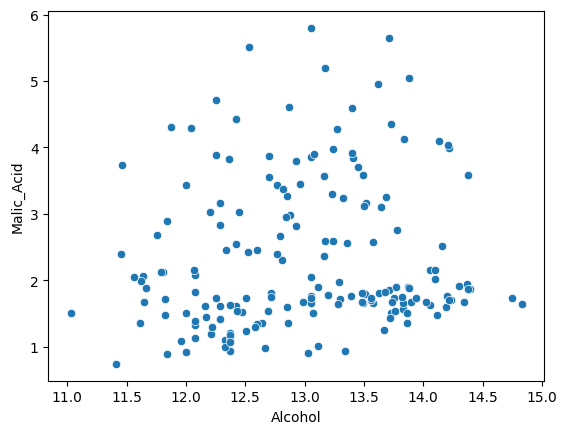

In [22]:
sns.scatterplot(x='Alcohol',y='Malic_Acid',data=df)

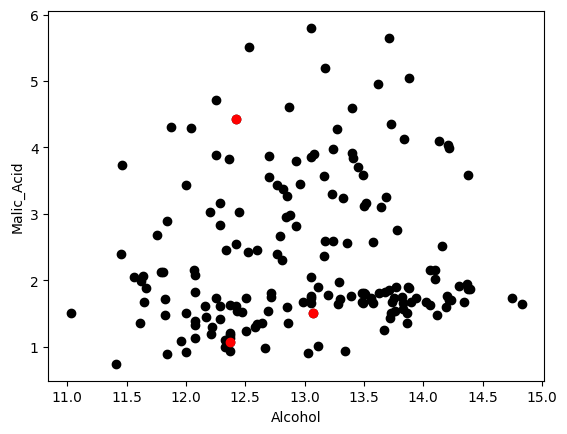

In [23]:
# Steps 1: choosin the number of clusters (k) = 3
# Steps 2: selecting random centroids for each cluster
import matplotlib.pyplot as plt

X=df
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Alcohol"],X["Malic_Acid"],c='black')
plt.scatter(Centroids["Alcohol"],Centroids["Malic_Acid"],c='red')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

In [24]:
# Choose the number of clusters (k)
k = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

In [25]:
# Fit the model to the scaled data
kmeans.fit(df)

# Add the predicted labels to the original dataset
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


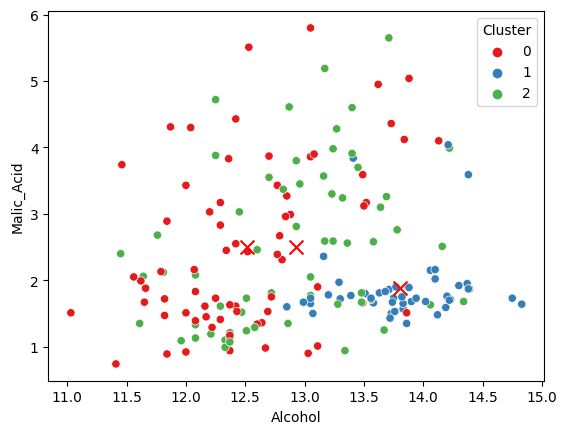

In [27]:
# Get cluster centroids
centroids = kmeans.cluster_centers_
# Plot the data points and centroids
sns.scatterplot(data=X, x="Alcohol", y="Malic_Acid", hue="Cluster", palette="Set1")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

In [30]:
# Get the inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Print the inertia
print("Inertia:", inertia)

Inertia: 2370795.7260536556


# Optimal k Value: Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

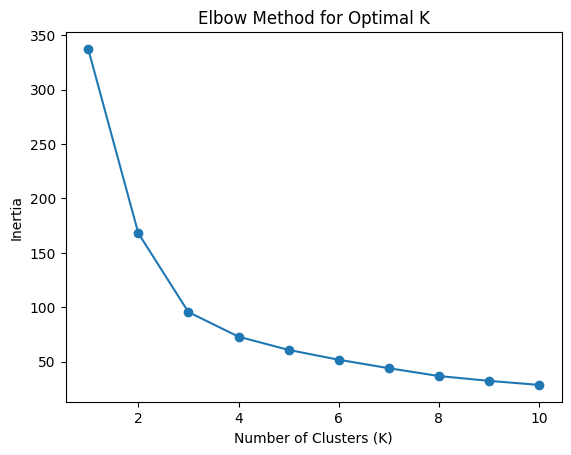

In [31]:
# Define a range of K values to test
K_range = range(1, 11)  #(start, stop+1)  (start=1 , stop = 10)  (1,11)
inertia_values = []

# Calculate the inertia for different values of K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X[["Alcohol", "Malic_Acid"]])
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Plot the inertia values
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

Here, K = 3

In [32]:
# Evaluate the clustering using silhouette score, Dunn score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X[["Alcohol", "Malic_Acid"]], X["Cluster"])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.07542385651585905


Agglomerative Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


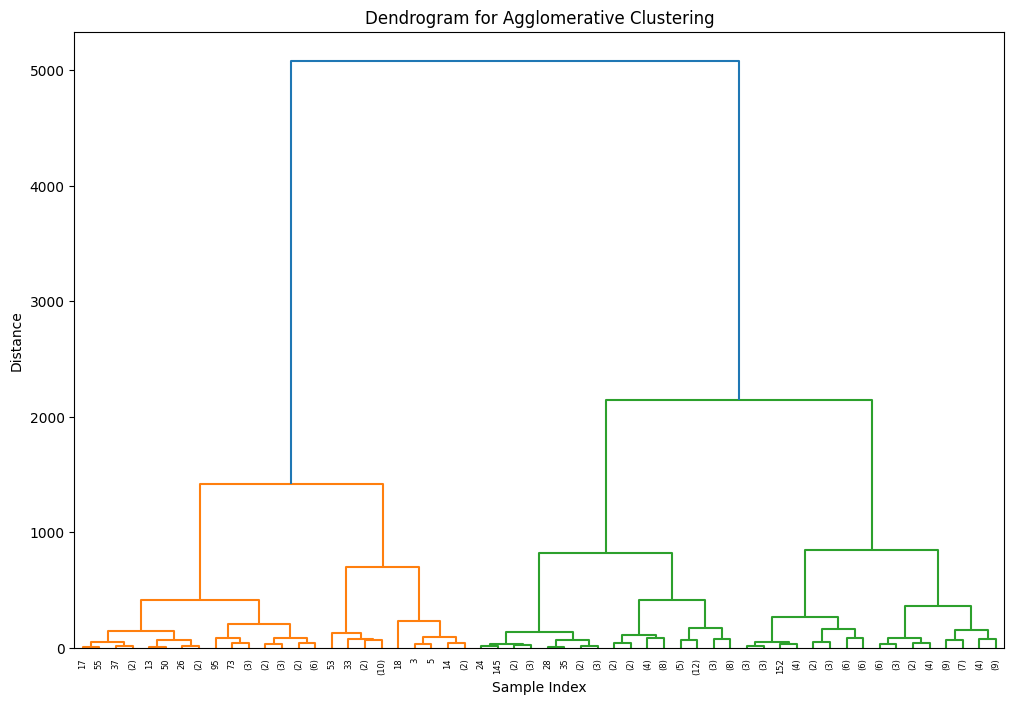

In [50]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Choose the number of clusters
k = 3

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
cluster_labels = agg_cluster.fit_predict(df)

# Visualize the Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage(df, method='ward'), p=5, truncate_mode='level')
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering

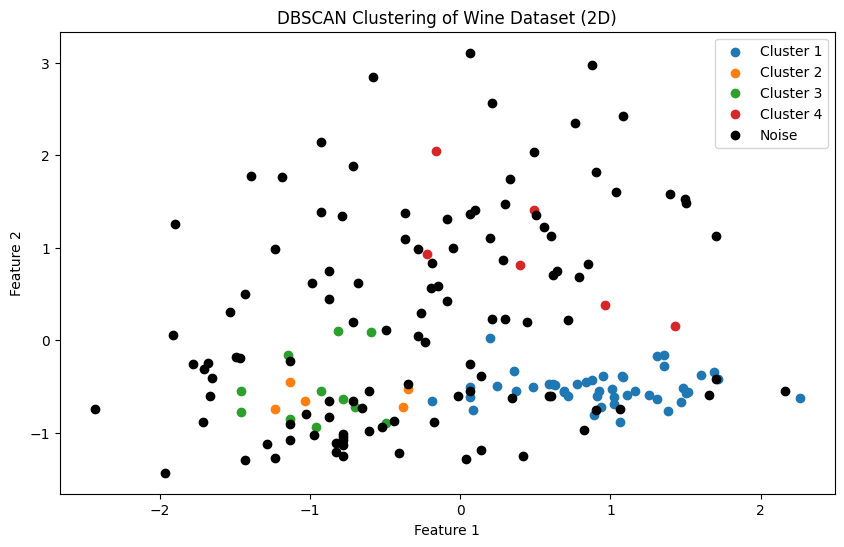

In [59]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# DBSCAN
eps_value = 2
min_samples_value = 5
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
cluster_labels = dbscan.fit_predict(data_scaled)

# Visualizing the clusters in 2D
plt.figure(figsize=(10, 6))

# Plotting each cluster with a different color
unique_labels = set(cluster_labels)
for label in unique_labels:
    if label == -1:
        # Noise points are plotted as black
        cluster_data = data_scaled[cluster_labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color='black', label=f'Noise')
    else:
        # Other clusters are plotted with different colors
        cluster_data = data_scaled[cluster_labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label + 1}')

plt.title('DBSCAN Clustering of Wine Dataset (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
